# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

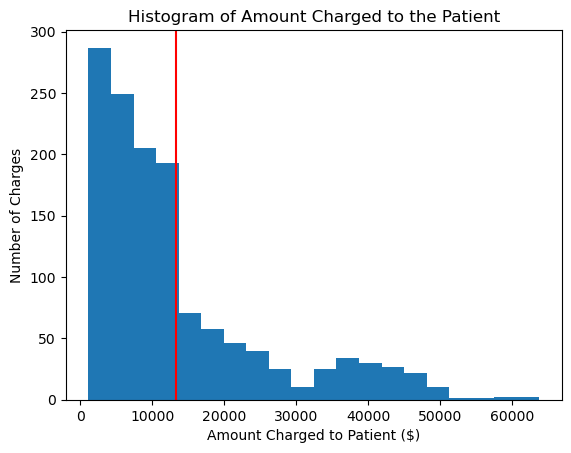

The average charge is: $13270.42. The standard error of charges is: $331.07.


In [27]:
_ = plt.hist(medical['charges'], bins = 20)
_ = plt.xlabel('Amount Charged to Patient ($)')
_ = plt.ylabel('Number of Charges')
_ = plt.title('Histogram of Amount Charged to the Patient')
mean_charges = medical['charges'].mean()
std_error_charges = medical['charges'].std() / np.sqrt(len(medical['charges'])) # std_error = stddev / sqrt(n)
plt.axvline(mean_charges, color = 'red')
plt.show()
print(f'The average charge is: ${mean_charges:.2f}. The standard error of charges is: ${std_error_charges:.2f}.')

The above statistics are estimates of the true population mean and standard deviation.  Given that the sample size in pretty large (n  = 1338), this could be a good approximation of their true value.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ This is a pretty large sample size (n = 1338) and, if truly a random representative sample, would be a good approximation of the true population distribution. To determine how likely the mean of this sample is representative of the true population mean, we can calculate the p-value of getting a sample mean of \$13,270 as well as the 95% confidence interval of the mean.  **In this case, since we're trying to figure out if the true mean is within the range of (greater than or less than) our sample mean, a two-sided interval would be appropriate.**

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [30]:
# A two-sided interval is appropriate in this case, as dicussed above.
# Let's use the t-distribution to calculate the two sided confidence interval of 95%

upper_limit_t = t.ppf(0.975, df = len(medical['charges']) - 1,loc = mean_charges, scale = std_error_charges)
lower_limit_t = t.ppf(0.025, df = len(medical['charges']) - 1, loc = mean_charges, scale = std_error_charges)
print(f'The 95% confidence interval for the mean is from ${lower_limit_t:.2f} to ${upper_limit_t:.2f}.\nThe administrator should not be too concerned since the whole interval is well above $12K.')

The 95% confidence interval for the mean is from $12620.95 to $13919.89.
The administrator should not be too concerned since the whole interval is well above $12K.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ **Null Hypothesis:** People with insurance are not charged a different amount.  In other words, the mean charge of the people with insurance is equal to the mean charge of the people without insurance.

**Alternative Hypothesis:** People with insurance are charged a different amount. In other words, the mean charge of the people with insurance does not equal the mean charge of people without insurance.

Since we're using a pooled standard deviation, we're assuming the variance of the two groups around their respective means are the same.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [96]:
# Manual Calculation:
insured_charges = medical[medical['insuranceclaim'] == 1]['charges'] # Created a subset of the medical df for charges of insured 
uninsured_charges = medical[medical['insuranceclaim'] == 0]['charges'] # Created a subset of the medical df for charges of uninsured

n_insured = len(insured_charges) # Calculates the number of insured in our sample
n_uninsured = len(uninsured_charges) # Calculates the number of uninsured in our sample

std_dev_insured = np.std(insured_charges, ddof = 1) # Calculates the std dev of the sample of insured
std_dev_uninsured = np.std(uninsured_charges, ddof = 1) # Calculates the std dev of the sample of uninsured

# Calculates the pooled std dev and the t-stat below
pooled_stddev = np.sqrt((((n_insured - 1) * std_dev_insured**2) + ((n_uninsured - 1) * std_dev_uninsured**2)) / (n_insured + n_uninsured - 2))
t_stat = (np.mean(insured_charges) - np.mean(uninsured_charges)) / (pooled_stddev * np.sqrt((1/n_insured) + (1/n_uninsured)))

# Calculates the associated p-value
p_value = 2 * (1 - t.cdf(t_stat, len(medical) - 2))

print(f'The manually calculated t-stat is {t_stat:.5f}.\nThe p_value associated with this t-stat is: {p_value:.2e}. It is really small, so is showing up as 0.')

The manually calculated t-stat is 11.89330.
The p_value associated with this t-stat is: 0.00e+00. It is really small, so is showing up as 0.


In [94]:
# Caclulate using scipy.stats. To do this I will use the ttest_ind() function.
t_stat_scipy, p_value_scipy = ttest_ind(insured_charges, uninsured_charges)
print(f'The t-stat from scipy.stats is {t_stat_scipy:.5f} and the associated p-value is {p_value_scipy:.2e}. This is equal to the manual calculation above.')


The t-stat from scipy.stats is 11.89330 and the associated p-value is 4.46e-31. This is equal to the manual calculation above.


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There is not a specific function for a z-test from a sample.  This is because to execute a z-test the population variance needs to be known.  Therefore it is usually better to do a t-test.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test